In [ ]:
# Notes
# using C_J = C in P_N function (somewhere else too)

In [1]:
import math
import scipy.integrate as integrate
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.ndimage import gaussian_filter
from numpy import e, pi
from scipy import constants
#plt.rcParams.update({'font.size': 16})

## define variables in mixed SI and eV units
it's intriguing that the constants are in units eV while the temp and electrical stuff are in SI units

In [97]:
## constants
eVperJoule = 6.241509e18 # 1J = 6.24e18eV
h = 6.62607015e-34*eVperJoule # (eV*s)
hbar = h/(2*pi)
el = -1.602176634e-19 # (C)
kB = 1.380649e-23*eVperJoule # (eV/K)

## Define our values
T = 4.7
R = 40
L = 5e-9
C = 5e-15
R_Q = (h/eVperJoule)/(2*el**2) # put h back in SI units so R_Q is units ohms

## define variables strictly in SI

In [2]:
## constants
h = 6.62607015e-34 # (J*s)
hbar = h/(2*pi)
el = -1.602176634e-19 # (C)
kB = 1.380649e-23 # (J/K)

## Define our values
T = 4.7
R = 40
L = 5e-9
C = 5e-15
R_Q = h/(2*el**2) # ohms

Ec = el**2/(2*C)

print(f"Q = {np.sqrt(L/C)/R}")

Q = 25.0


## define functions

In [3]:
# Define Z_T
alpha = R/R_Q
omega_c = 1/(R*C)
omega_s = (L*C)**(-1/2)
Q = omega_c / omega_s
def Z_T(omega):
    return R_Q*alpha*(1 + 1j*Q**2*omega/omega_c)/(1+1j*(omega/omega_c)-Q**2*(omega/omega_c)**2)

# define Z_TT
def Z_TT(omega):
    return 1/(1j*omega*C+(Z_T(omega))**(-1))

# Define D 
beta = (kB*T)**-1
D = (pi/beta)*(Z_TT(0).real/R_Q)

# Define I 
def I(E):
    return (1/pi)*(D/(D**2+E**2))

# Define little k
def kk(omega):
    return (1/(1-e**(-beta*hbar*omega)))*(Z_TT(omega).real/R_Q)-(1/(beta*hbar*omega))*(Z_TT(0).real/R_Q)

# Define kappa 
def kappa(omega):
    summand_list = []
    for n in range(1000):
        summand = ((2*n*pi/(beta*hbar))/((2*n*pi/(beta*hbar))**2+omega**2)) * (Z_TT(-1j*(2*n*pi/(beta*hbar))))/R_Q
        summand_list.append(summand)
    summ = np.sum(summand_list)
    return np.real((1/(1-e**(-beta*hbar*omega)))*Z_TT(omega).imag/R_Q - (2/(beta*hbar))*summ)

def K(E, omega):
    return (hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega)

In [ ]:
omega_pts = np.linspace(-5e12,5e12,100)

In [30]:
min([abs(K(0,omega)) for omega in omega_pts])

9.747954154001418e-14

In [29]:
min([abs(kk(omega)) for omega in omega_pts])

0.00038140594434796617

## define functions with ang. frequency in units  $\omega_s$
in the functions below, omega is replaced with O * omega_s in functions of omega, where the new variable is the fractional frequency O. 

In [5]:
# Define Z_T
alpha = R/R_Q
omega_c = 1/(R*C)
omega_s = (L*C)**(-1/2)
Q = omega_c / omega_s

def Z_T(O):
    return R_Q*alpha*(1 + 1j*Q**2*O*omega_s/omega_c)/(1+1j*(O*omega_s/omega_c)-Q**2*(O*omega_s/omega_c)**2)

# define Z_TT
def Z_TT(O):
    return 1/(1j*O*omega_s*C+(Z_T(O))**(-1))

# Define D 
beta = (kB*T)**-1
D = (pi/beta)*(Z_TT(0).real/R_Q)

# Define I 
def I(E):
    return (1/pi)*(D/(D**2+E**2))

# Define little k
def kk(O):
    return (1/(1-e**(-beta*hbar*O*omega_s)))*(Z_TT(O).real/R_Q)-(1/(beta*hbar*O*omega_s))*(Z_TT(0).real/R_Q)

# Define kappa 
def kappa(O):
    summand_list = []
    for n in range(1000):
        summand = ((2*n*pi/(beta*hbar))/((2*n*pi/(beta*hbar))**2+(O*omega_s)**2)) * (Z_TT(-1j*(2*n*pi/(beta*hbar))))/R_Q
        summand_list.append(summand)
    summ = np.sum(summand_list)
    return np.real((1/(1-e**(-beta*hbar*O*omega_s)))*Z_TT(O).imag/R_Q - (2/(beta*hbar))*summ)

In [185]:
##
##
##
##
##
##
# This is where i am 
##

## Recursive integral testing

In [3]:
# suppose we have a recursive integral f(x0) = int(f(x-x0))
# and we have a first guess for f, namely g.
# then f1(x0) = int(f0(x-x0)) = int(g(x-x0))
# and  f2(x0) = int(f1(x-x0)) = int(int(g((x-x0)-x0)))

# try uncommenting one of the blocks below at a time. the last line of each should print -8.0
# if it says "this works" at the beginning. they all do the same thing.

# this works.
# f1 = lambda x0: integrate.quad(lambda x: x - x0, -1, 1)[0]
# f2 = lambda x0: integrate.quad(lambda x: f1(x-x0), -1, 1)[0]
# f3 = lambda x0: integrate.quad(lambda x: f2(x-x0), -1, 1)[0]
# f3(1)

# this works.
# now, turn this into a loop. first, an unraveled loop
# # for the first evaluation, we explicitly enter f0 as a lambda expression
# f_list = np.empty(3,dtype=object) # just a generic array
# f_list[0] = lambda x0: integrate.quad(lambda x: x - x0, -1, 1)[0]
# f_list[1] = lambda x0: integrate.quad(lambda x: f_list[0](x-x0), -1, 1)[0]
# f_list[2] = lambda x0: integrate.quad(lambda x: f_list[1](x-x0), -1, 1)[0]
# f_list[2](1)

# this does not work, even though I think it is functionally equivalent to the lines above
# iters = 3
# f_list = np.empty(3,dtype=object) # just a generic array
# f_list[0] = lambda x0: integrate.quad(lambda x: x - x0, -1, 1)[0]
# for i in range(iters-1):
#     f_list[i+1] = lambda x0: integrate.quad(lambda x: f_list[i](x-x0), -1, 1)[0]
# f_list[2](1)

# this works!
def recursive_integral(i):
    if i == 0:
        return lambda x0: integrate.quad(lambda x: x - x0, -1, 1)[0]
    else:
        return lambda x0: integrate.quad(lambda x: recursive_integral(i-1)(x-x0), -1, 1)[0]

recursive_integral(2)(1)

-8.0

In [12]:
# Testing if P0 converges for i iterations at E=0

# SI units. this takes > 10 minutes for recursion depth of only 2
def recursive_PE_integral(i, omega_min, omega_max):
    """
    i: number of iterations
    return:
        a lambda function for P which can be evaluated at E
    """
    if i == 0:
        # this is P(E) with the trial function I(E) for P(E-h*omega) in integrand
        return lambda E: I(E) + integrate.quad(lambda omega: 
                                        K(E,omega)*I(E-hbar*omega), omega_min, omega_max, points=[0])[0]
    else:
        # this is the ith iteration of P(E), which references the (i-1)th iteration
        return lambda E: I(E) + integrate.quad(lambda omega:
                                        K(E,omega)*recursive_PE_integral(i-1, omega_min, omega_max)(E - hbar*omega), 
                                        omega_min, omega_max, points=[0])[0]

In [13]:
%%time
recursive_PE_integral(2, -5e12, 5e12)(0)

KeyboardInterrupt: 

In [61]:
hbar*5e12, Ec # these are close, so we should change the integration variable to be in hbar*omega/Ec.

(5.272859088230782e-22, 2.5669699665355694e-24)

In [72]:
hbar*omega_s, Ec

(1.3252140300000001e-22, 2.5669699665355694e-24)

In [91]:
omega_max = 5e12
omega_max/omega_s

3.978873577297384

In [70]:
Omega_max = omega_max*/omega # put omega in units Ec/hbar to make it a reasonable size
Omega_max

205.41179511138304

## explicity discrete sum instead of integration 

In [31]:
omega_pts = np.linspace(-5e12, 5e12, 100) # should be ~ 4000
d_omega = omega_pts[1]-omega_pts[0]

# this kills the kernel
# iters = 2
# P = lambda E: I(E)
# for i in range(iters):
#     P = lambda E: I(E) + sum([K(E, omega)*P(E-hbar*omega) for omega in omega_pts])

def recursive_P_sum(i):
    """returns the function P(E)"""
    if i == 0:
        return lambda E: I(E)
    else:
        return lambda E: I(E) + sum([K(E, omega)*recursive_P_sum(i-1)(E-hbar*omega) for omega in omega_pts])*d_omega

In [33]:
%%time
recursive_P_sum(2)(0)

CPU times: total: 37 s
Wall time: 37.1 s


-5.797178289162406e+24

In [ ]:
%%time
Elist = np.array([0,1,2])*hbar*omega_s
Plist = [recursive_P_sum(10)(E) for E in Elist]
plt.scatter(Elist, Plist)

## matrix method

In [69]:
K = lambda E, omega: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))
                                         *kappa(omega))

omega_min = -5e12
omega_max = -omega_min
num_omega_pts = 1001
d_omega = (omega_max - omega_min)/num_omega_pts
omega_pts = np.arange(omega_min,omega_max,d_omega)

iters = 2 # recursion steps

Emin = -3*hbar*omega_s # the bounds for the domain of the final P(E) we want to compute
Emax = -Emin
# E to cover the range we need for shifting
# E_pts = np.arange(Emin - iters*hbar*omega_max + hbar*d_omega, Emax - iters*hbar*omega_min - hbar*d_omega, hbar*d_omega)
E_pts = np.linspace(Emin, Emax, num_omega_pts)

# E_pts = Emin - iters*hbar*omega_max, Emax - iters*hbar*omega_min, hbar*d_omega)

num_E_pts = len(E_pts)

# Kmat = np.array([[K(E,omega) for omega in omega_pts] for E in E_pts])

# assert num_E_pts % num_omega_pts == 0

In [62]:
Kmat[0,1], K(E_pts[0],omega_pts[1])

(9.717233401667145e-18, -6.584416955258564e-16)

In [71]:
%%time
for i in range(1,iters+1):
    print(f"iteration {i}")
    Pnext = np.zeros(num_E_pts)
    
    # K matrix evaluated at E - (iters-1)*hbar*omega
    Kmat = np.array([[K(E - (iters-i)*hbar*omega,omega) for omega in omega_pts] for E in E_pts])
    
    # compute the array Pnext, which is P(E_pts - (iters-i)*hbar*omega)
    for j in range(num_E_pts):
        
        if i == 1:
            Pnext[j] = I(E_pts[j] - (iters-i)*hbar*omega_min) + np.nansum(
                Kmat[j,:]*I(E_pts[j] - iters*hbar*omega_pts))*d_omega
        else:
            Pnext[j] = I(E_pts[j] - (iters-i)*hbar*omega_min) + np.nansum(Kmat[j,:]*P_shifted)*d_omega
    P_shifted = Pnext

iteration 1


KeyboardInterrupt: 

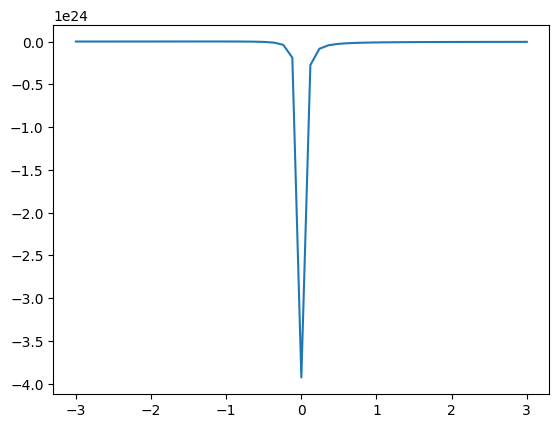

In [68]:
plt.plot(E_pts/(hbar*omega_s),Pnext)

In [72]:
a = np.array([[1,1],[1,1]])
b = np.array([[2,2],[2,2]])
a*b

array([[2, 2],
       [2, 2]])

In [73]:
a = np.mat([[1,1],[1,1]])
b = np.mat([[2,2],[2,2]])
a*b

matrix([[4, 4],
        [4, 4]])

In [75]:
np.matrix([1,1]).shape

(1, 2)

In [85]:
np.array([1,1]).T, np.array([1,1])

(array([1, 1]), array([1, 1]))

In [84]:
np.matrix([1,1]).T,np.matrix([1,1])

(matrix([[1],
         [1]]),
 matrix([[1, 1]]))

In [91]:
one = np.array([1j,0])
np.outer(one.conjugate(),one)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

## other misc. testing

In [156]:
# Testing if P0 converges for 12 iterations at E=0
this_list = []
#E_list = np.arange(-1.5,2,.1)/E_units
#E_list = np.arange(-0.01,0.01,.00001)/E_units
thisE_list = [0]
for E in thisE_list:
    iters = 15
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 = I(E)+integrate.quad(KIx,-5e12,5e12,args=(E),points=[0])[0]
        print(P0)
        this_list.append(P0)
    

<function <lambda> at 0x181f3d8268>


TypeError: unsupported operand type(s) for *: 'float' and 'function'

In [380]:
# Testing that P0 converges for 12 iterations at E=0
this_list = []
#E_list = np.arange(-1.5,2,.1)/E_units
#E_list = np.arange(-0.01,0.01,.00001)/E_units
thisE_list = [0]
for E in thisE_list:
    iters = 30
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 = I(E) + integrate.quad(KIx,-5e11,5.1e11,args=(E))[0]
        print(P0)
        this_list.append(P0)
    

293478.3124514391
401475.08595838083
489806.2165854669
562052.7141843772
621143.5055990727
669474.17554241
709004.0853853656
741335.8071269472
767780.0928571192
789409.0136231794
807099.4219888235
821568.5002904246
833402.8357433269
843082.2011246257
850999.0051190325
857474.2008593387
862770.2976055641
867102.0030659542
870644.9278074529
873542.7046389352
875912.8115923002
877851.3345694186
879436.8627361879
880733.6745858754
881794.3438371299
882661.870811708
883371.425699559
883951.77438453
884426.4446347307
884814.6799357843


Text(0.5, 0, 'E (hbar*omega_s)')

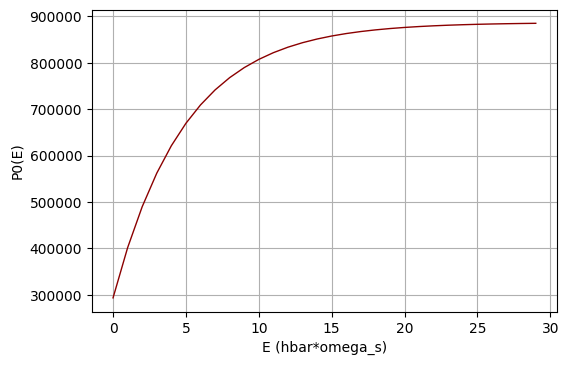

In [385]:
fig, ax = plt.subplots(dpi=100)
ax.plot(np.arange(30), this_list, linewidth=1, color='darkred')

#ax.set_xlim((-6,6))
#ax.set_ylim((-0.05,1.05))
ax.grid()
ax.set_ylabel("P0(E)")
ax.set_xlabel("E (hbar*omega_s)")

In [320]:
1*E_units

0.0008271335295171271

In [342]:
# Testing that P0 converges for 12 iterations at E=1
this_new_list = []
#E_list = np.arange(-1.5,2,.1)/E_units
#E_list = np.arange(-0.01,0.01,.00001)/E_units
units1 = 1*E_units
thisE_new_list = [units1]
for E in thisE_new_list:
    iters = 12
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 = I(E) + integrate.quad(KIx,-5e11,5.1e11,args=(E))[0]
        print(P0)
    this_new_list.append(P0)

0.009767099122165617
0.009767105437135843
0.009767105442215668
0.009767105442219754
0.009767105442219757
0.009767105442219757
0.009767105442219757
0.009767105442219757
0.009767105442219757
0.009767105442219757
0.009767105442219757
0.009767105442219757


In [354]:
# Calculating P0 without adding I(E) at 50mK 
P0_0_list = []
#E_list = np.arange(-1.5,2,.1)/E_units
#E_list = np.arange(-0.01,0.01,.0001)/E_units
E_list = np.arange(-0.0001,0.0001,.000001)/E_units
#E_list = [0]
for E in E_list:
    iters = 12
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 =  integrate.quad(KIx,-5e11,5.1e11,args=(E))[0]
    P0_0_list.append(P0)
    #print(P0)

Text(0.5, 0, 'E (hbar*omega_s)')

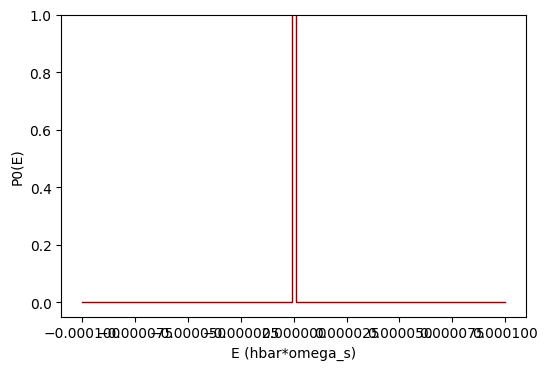

In [361]:
fig, ax = plt.subplots(dpi=100)
ax.plot(E_list*E_units, P0_0_list, linewidth=1, color='darkred')

#ax.set_xlim((-6,6))
ax.set_ylim((-0.05,1))
#ax.grid()
ax.set_ylabel("P0(E)")
ax.set_xlabel("E (hbar*omega_s)")

In [64]:
(1e-5-1e-12)/1e-7

99.99999000000003

In [87]:
T=50e-3

In [118]:
# Calculating P0 without I(E) at 4.7K around 0
P0_0_list = []
E_units = hbar*omega_s
#E_list = np.arange(-1.5,2,.1)/E_units
#E_list = np.arange(-0.01,0.01,.0001)/E_units
#E_list = np.arange(-0.00005,0.00005,.00001)
E_list=[0]
for E in E_list:
    iters = 15
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 =  I(E)+integrate.quad(KIx,-5e12,-1e-12,args=(E))[0]+integrate.quad(KIx,1e-12,5e12,args=(E))[0]
        #P0 =  I(E)+integrate.quad(KIx,-5e12,5.1e12,args=(E))[0]
        print(P0)
    P0_0_list.append(P0)


-378098.3472726699
1425069.0640677945
-4601244.049406245
15539120.906852439
-51771404.273850195
173185134.99154538
-578635541.2311922
1934002371.1487253
-6463411371.777507
21601339710.12214
-72193044775.51393
241274426764.37085
-806356049755.858
2694899152075.682
-9006543544657.2


Text(0.5, 0, 'E (hbar*omega_s)')

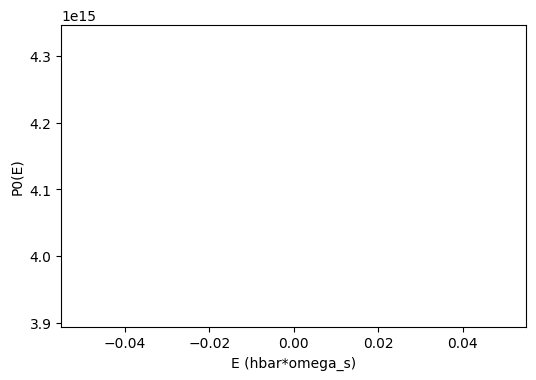

In [72]:
fig, ax = plt.subplots(dpi=100)
ax.plot(E_list, P0_0_list, linewidth=1, color='darkred')

#ax.set_xlim((.005,.01))
#ax.set_ylim((-.05e11,.05e11))
#ax.grid()
ax.set_ylabel("P0(E)")
ax.set_xlabel("E (hbar*omega_s)")

In [65]:
# Calculating P0 with I(E) at 4.7K at 0
P0_0_list = []
E_units = hbar*omega_s
#E_list = np.arange(-1.5,2,.1)/E_units
#E_list = np.arange(-0.01,0.01,.0001)/E_units
E_list = np.arange(-0.00005,0.00005,.000001)
for E in E_list:
    iters = 12
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 =  I(E)+integrate.quad(KIx,-5e12,-1e-12,args=(E))[0]+integrate.quad(KIx,1e-12,5e12,args=(E))[0]
    P0_0_list.append(P0)
    #print(P0)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(E_list, P0_0_list, linewidth=1, color='darkred')

#ax.set_xlim((.005,.01))
#ax.set_ylim((-.05e11,.05e11))
#ax.grid()
ax.set_ylabel("P0(E)")
ax.set_xlabel("E (hbar*omega_s)")

In [389]:
# Calculating P0 with I(E) at 4.7K around 1*hw
P0_1_list = []
#E_list = np.arange(-1.5,2,.1)/E_units
#E_list = np.arange(-0.01,0.01,.0001)/E_units
E_list = np.arange(0.9999,1.0001,.000001)/E_units
#E_list = [0]
for E in E_list:
    iters = 12
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 =  integrate.quad(KIx,-5e11,5.1e11,args=(E))[0]
    P0_1_list.append(P0)
    #print(P0)

Text(0.5, 0, 'E (hbar*omega_s)')

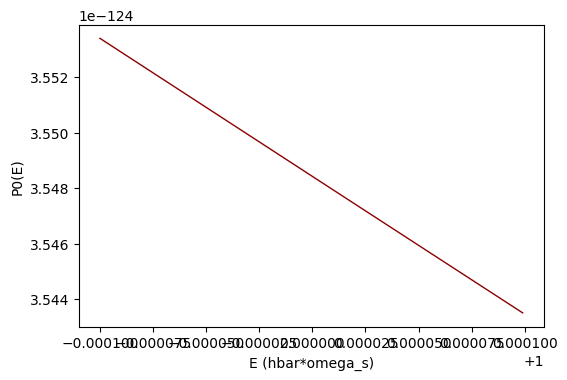

In [390]:
fig, ax = plt.subplots(dpi=100)
ax.plot(E_list*E_units, P0_1_list, linewidth=1, color='darkred')

#ax.set_xlim((-6,6))
#ax.set_ylim((-0.05,1))
#ax.grid()
ax.set_ylabel("P0(E)")
ax.set_xlabel("E (hbar*omega_s)")

In [62]:
hbar*omega_s

0.0008271335295171271

In [73]:
# Calculating P0 with I(E) at 4.7K at E=0, removing omega=0
P0_0_list = []
#E_list = np.arange(-0.0001,0.0001,.00001)
E_list = np.arange(0.0001,0.001,.00001)
for E in E_list:
    iters = 12
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 =  I(E) + integrate.quad(KIx,-5e11,-1e-11,args=(E))[0] + integrate.quad(KIx,1e-11,5e11,args=(E))[0]
    P0_0_list.append(P0)
    #print(P0)

Text(0.5, 0, 'E')

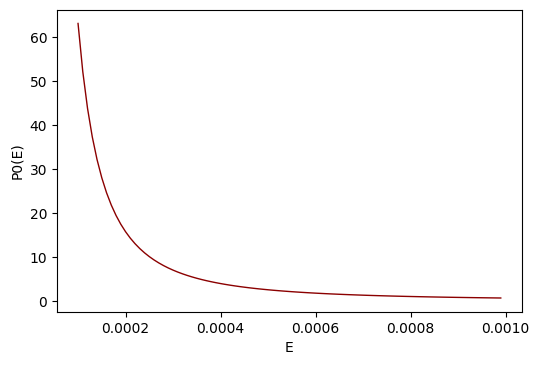

In [74]:
fig, ax = plt.subplots(dpi=100)
ax.plot(E_list, P0_0_list, linewidth=1, color='darkred')

#ax.set_xlim((-6,6))
#ax.set_ylim((-100,100000))
#ax.grid()
ax.set_ylabel("P0(E)")
ax.set_xlabel("E")

In [79]:
# Calculating P0 with I(E) at 4.7K at E=0, removing omega=0
P0_0_list = []
#E_list = np.arange(-0.0001,0.0001,.00001)
E_list = np.arange(0.0008,0.0009,.00001)
for E in E_list:
    iters = 12
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 =  I(E) + integrate.quad(KIx,-5e12,-1e-12,args=(E))[0] + integrate.quad(KIx,1e-12,5e12,args=(E))[0]
    P0_0_list.append(P0)
    #print(P0)

Text(0.5, 0, 'E')

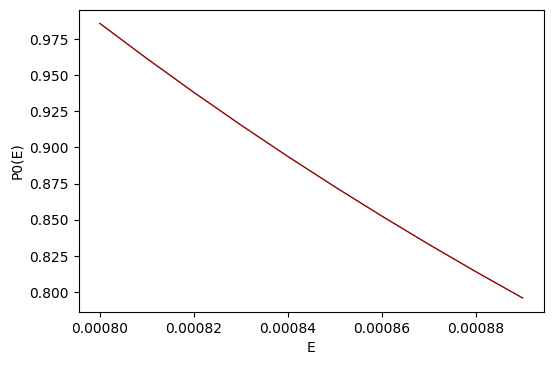

In [80]:
fig, ax = plt.subplots(dpi=100)
ax.plot(E_list, P0_0_list, linewidth=1, color='darkred')

#ax.set_xlim((-6,6))
#ax.set_ylim((-100,100000))
#ax.grid()
ax.set_ylabel("P0(E)")
ax.set_xlabel("E")

### Try doing integral as a sum

In [ ]:
def function_to_integrate(x):
    return ((hbar*E/(D**2+E**2))*kk(omega)+(hbar*D/(D**2+E**2))*kappa(omega))*P0

def simpsons_rule_integral(a, b, n):
    """
    Calculate the approximate integral of a function using Simpson's rule.

    Parameters:
        a (float): Lower limit of integration.
        b (float): Upper limit of integration.
        n (int): Number of intervals (must be an even number).

    Returns:
        float: Approximate value of the integral.
    """
    if n % 2 != 0:
        raise ValueError("The number of intervals (n) must be an even number for Simpson's rule.")

    for i in range(n+1):
        delta_x = (b - a) / n
        x_values = a + i * delta_x

    integral_approx = 0
    for i in range(0, n, 2):
        integral_approx += (delta_x / 3) * (function_to_integrate(x_values[i])
                                            + 4 * function_to_integrate(x_values[i+1])
                                            + function_to_integrate(x_values[i+2]))

    return integral_approx

# Example usage:
lower_limit = -5e12
upper_limit = 5e12
num_intervals = int(20e12)
result = simpsons_rule_integral(lower_limit, upper_limit, num_intervals)
print("Approximate integral:", result)

In [408]:
.0001-hbar*5e12

-0.0031910597454924226

In [414]:
D/(D**2+(-.0003)**2)

21.907059849821124

In [423]:
I(0)

161437.62639762316

In [199]:
E=1e-5
-E**2/(4*E_C*kB*T)

-0.0009631609958585344

In [173]:
(1/(4*pi*E_C*kB*T)**(-1/2))

0.0005711175327702512

In [159]:
# Define P_N function 
E_C = joule*(2*el)**2/(2*C)
def P_N(E):
    return (1/(4*pi*E_C*kB*T)**(-1/2))*e**(-E**2/(4*E_C*kB*T))

In [160]:
E_C

6.408706459544583e-05

In [176]:
E_C*kB*T

2.5956200580688706e-08

In [163]:
E=.01
-E**2/(4*E_C*kB*T)

-963.1609958585343

In [172]:
e**(.1)

1.1051709180756477

In [210]:
P_N(0.001)

3.747748473513571e-08

In [169]:
kB

8.617333159341e-05

### Calculating P(E)

In [245]:
# Calculating P(E)
PE_list = []
E_list = np.arange(-0.001,0.001,.0001)/E_units
i=-1
#E_list = [0]
for E in E_list:
    #for i in range(len(P0_0_list)):
    i=i+1
    P0PN = lambda E: P0_0_list[i]*P_N(E)
    P = integrate.quad(P0PN,-5e11,5.1e11)[0]
    PE_list.append(P)

In [246]:
P0_0_list

[4.293846383287497e-07,
 5.301044591638165e-07,
 6.709134045548682e-07,
 8.762949724016322e-07,
 1.1927346663676972e-06,
 1.7175376026966246e-06,
 2.6836517615425124e-06,
 4.7709342644569625e-06,
 1.0734592192736445e-05,
 4.293824994319039e-05,
 821568.5006043718,
 4.29387252519192e-05,
 1.0734651606327553e-05,
 4.770951868483956e-06,
 2.6836591882414e-06,
 1.717541405166455e-06,
 1.1927368668710715e-06,
 8.762963581413663e-07,
 6.709143328922293e-07,
 5.301051111648162e-07]

In [226]:
P_N(0)*821568

469.21188916298973

In [247]:
PE_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Text(0.5, 0, 'E (hbar*omega_s)')

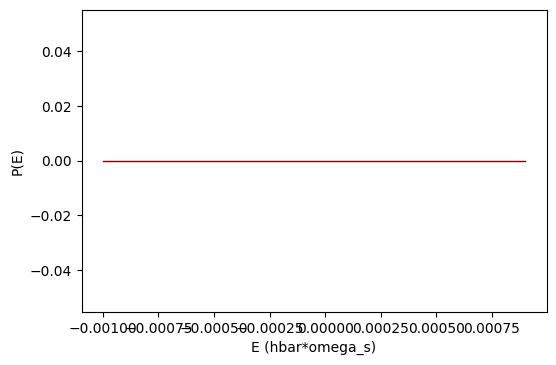

In [248]:
fig, ax = plt.subplots(dpi=100)
ax.plot(E_list*E_units, PE_list, linewidth=1, color='darkred')

#ax.set_xlim((-6,6))
#ax.set_ylim((-0.05,1.05))
#ax.grid()
ax.set_ylabel("P(E)")
ax.set_xlabel("E (hbar*omega_s)")

In [33]:
P0_list = []
E_units = hbar*omega_s
E_list = np.arange(-0.5,1.5,.5)/E_units
#np.arange(-.5,.6,.1)
for E in E_list:
    iters = 1
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        print(E*E_units)
        print(P0)
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega) + (hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 = I(E) + integrate.quad(KIx,-5e12,5.5e12,args=(E))[0]
    P0_list.append(P0)

-0.5
1.7175395039327639e-12
0.0
161437.62639762316
0.5
1.7175395039327639e-12
1.0
4.2938487598319097e-13


Text(0.5, 0, 'E (hbar*omega_s)')

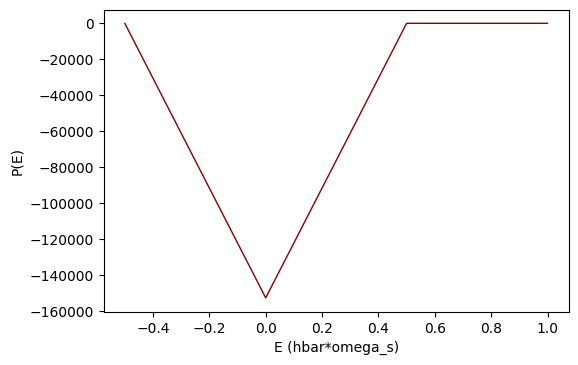

In [196]:

fig, ax = plt.subplots(dpi=100)
ax.plot(E_list*E_units, P0_list, linewidth=1, color='darkred')

#ax.set_xlim((-6,6))
#ax.set_ylim((-0.05,1.05))
#ax.grid()
ax.set_ylabel("P(E)")
ax.set_xlabel("E (hbar*omega_s)")

In [53]:

P0_list = []
E_units = hbar*omega_s
E_list = np.arange(-0.01,0.01,.00001)/E_units
#np.arange(-.5,.6,.1)
for E in E_list:
    iters = 1
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        #print(E*E_units)
        #print(P0)
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega) + (hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 = integrate.quad(KIx,-5e12,5.5e12,args=(E))[0]
    P0_list.append(P0)

Text(0.5, 0, 'E (hbar*omega_s)')

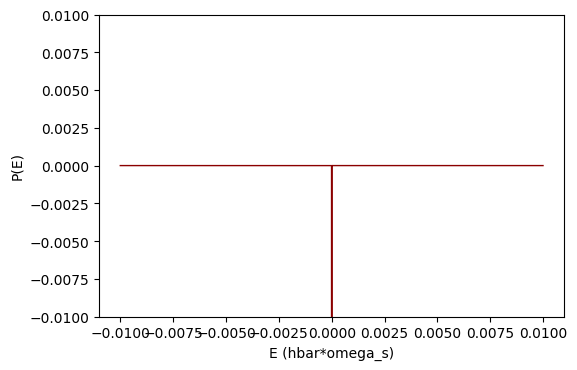

In [58]:

fig, ax = plt.subplots(dpi=100)
ax.plot(E_list*E_units, P0_list, linewidth=1, color='darkred')

#ax.set_xlim((-6,6))
ax.set_ylim((-.01,.01))
#ax.grid()
ax.set_ylabel("P(E)")
ax.set_xlabel("E (hbar*omega_s)")

In [35]:
P0_list = []
E_units = hbar*omega_s
E_list = np.arange(-1.5,2,.1)/E_units
#np.arange(-.5,.6,.1)
for E in E_list:
    iters = 3
    P0 = I(E)
    for i in range(iters): # iteratively solve for P0
        #print(E*E_units)
        KIx = lambda omega, E: ((hbar*E/(D**2+E**2))*kk(omega) + (hbar*D/(D**2+E**2))*kappa(omega))*P0
        P0 = I(E) + integrate.quad(KIx,-5e12,5.1e12,args=(E))[0]
        print(P0)
    P0_list.append(P0)

1.9083772220238997e-13
1.9083772220238997e-13
1.9083772220238997e-13
2.1907391575610314e-13
2.1907391575610314e-13
2.1907391575610314e-13
2.5407389041257535e-13
2.5407389041257535e-13
2.5407389041257535e-13
2.981839407627946e-13
2.981839407627946e-13
2.981839407627946e-13
3.548635327120886e-13
3.548635327120886e-13
3.548635327120886e-13
4.2938487444147095e-13
4.2938487444147095e-13
4.2938487444147095e-13
5.301047830495913e-13
5.301047830495913e-13
5.301047830495913e-13
6.709138657125642e-13
6.709138657125642e-13
6.709138657125642e-13
8.762956607770084e-13
8.762956607770084e-13
8.762956607770084e-13
1.1927357594823835e-12
1.1927357594823835e-12
1.1927357594823835e-12
1.7175394915990066e-12
1.7175394915990068e-12
1.7175394915990068e-12
2.6836554508055747e-12
2.683655450805575e-12
2.683655450805575e-12
4.7709430093791756e-12
4.770943009379176e-12
4.770943009379176e-12
1.073462170686484e-11
1.0734621706864843e-11
1.0734621706864843e-11
4.293848605659966e-11
4.293848605659972e-11
4.29384860

Text(0.5, 0, 'E (hbar*omega_s)')

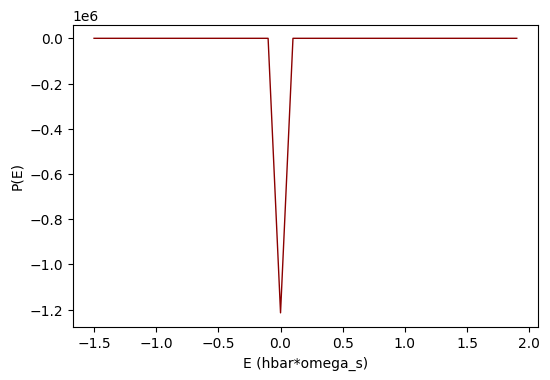

In [213]:

fig, ax = plt.subplots(dpi=100)
ax.plot(E_list*E_units, P0_list, linewidth=1, color='darkred')

#ax.set_xlim((-6,6))
#ax.set_ylim((-0.05,1.05))
#ax.grid()
ax.set_ylabel("P(E)")
ax.set_xlabel("E (hbar*omega_s)")